In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hdf5storage

In [2]:
# Load original and reconstructed data
original_data = np.load('/home/isacco/DATASETS/BINNED_TEMPERATURES/binned_temperature_cs.npy')
reconstructed_data = hdf5storage.loadmat('./DMD_solution_temperature/TensorReconst_temperature.mat')['TensorReconst']

print(f"Original data shape: {original_data.shape}")
print(f"Original data range: [{original_data.min():.4f}, {original_data.max():.4f}]")
print(f"Reconstructed data shape: {reconstructed_data.shape}")
print(f"Reconstructed data range: [{reconstructed_data.min():.4f}, {reconstructed_data.max():.4f}]")

Original data shape: (41, 76, 161, 500)
Original data range: [-0.2787, 0.2761]
Reconstructed data shape: (41, 76, 161, 500)
Reconstructed data range: [-0.3669, 0.4060]


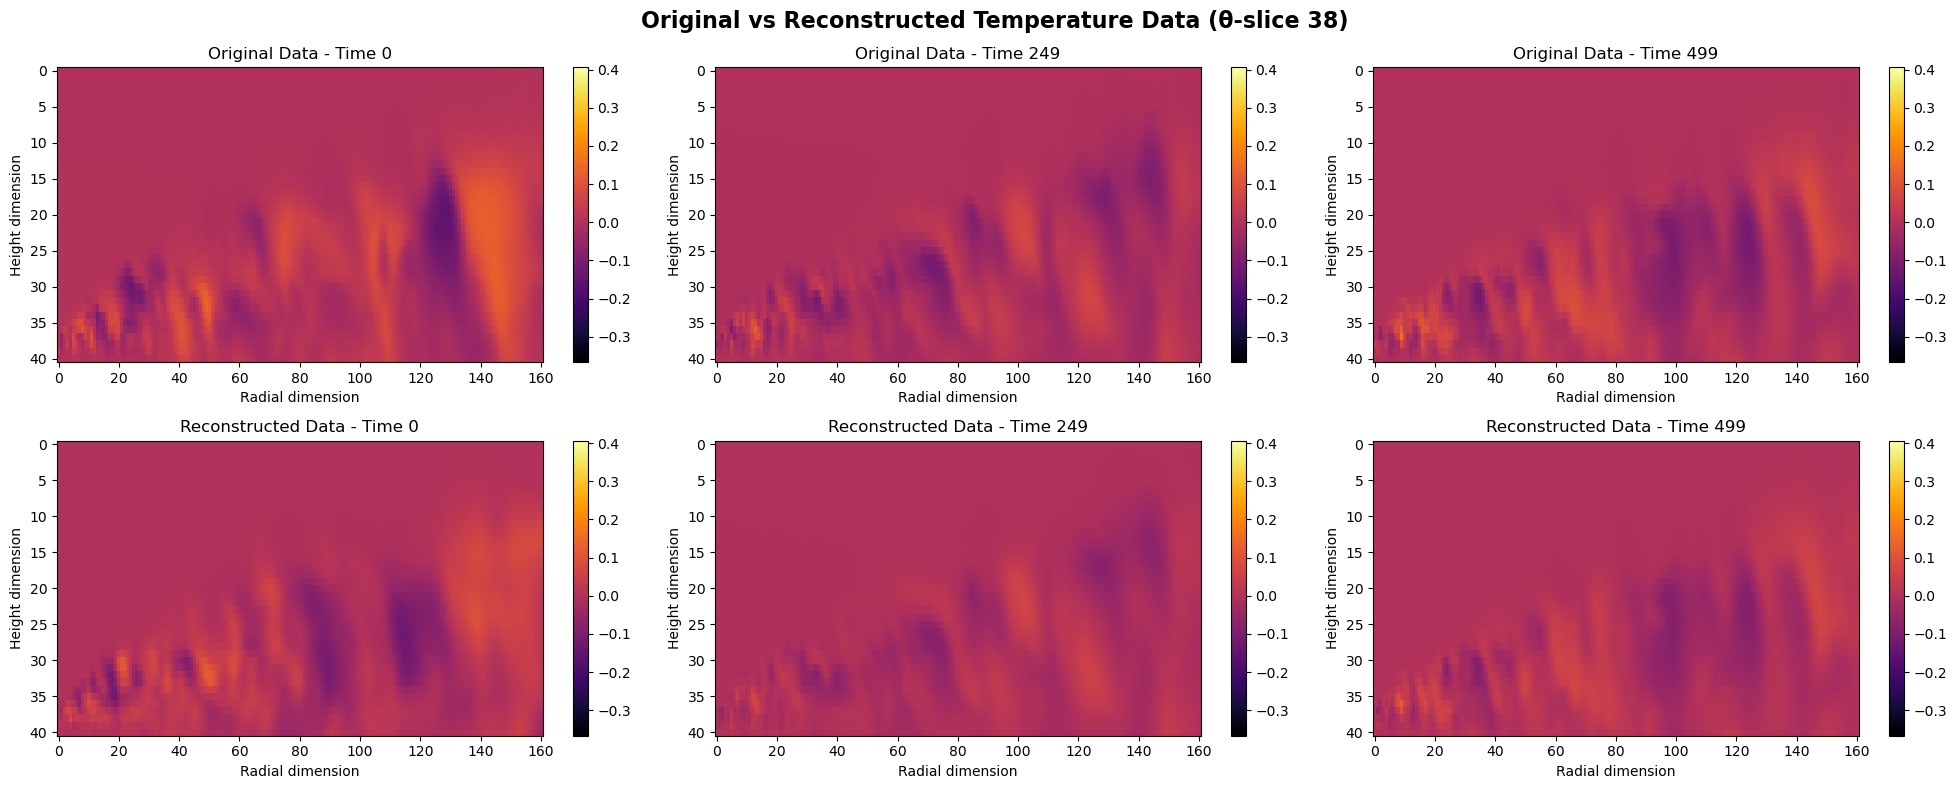

In [4]:
# Create comparison plot: Original (top) vs Reconstructed (bottom)
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

# Select time indices for comparison
time_indices = np.linspace(0, original_data.shape[3]-1, 3, dtype=int)
mid_slice = original_data.shape[1] // 2

# Global color scale for consistency
vmin = min(original_data.min(), reconstructed_data.min())
vmax = max(original_data.max(), reconstructed_data.max())

for i, t_idx in enumerate(time_indices):
    # Top row: Original data (flipped)
    im_orig = axes[0, i].imshow(np.flip(original_data[:, mid_slice, :, t_idx], axis=0), 
                               cmap='inferno', aspect='auto', vmin=vmin, vmax=vmax)
    axes[0, i].set_title(f'Original Data - Time {t_idx}')
    axes[0, i].set_xlabel('Radial dimension')
    axes[0, i].set_ylabel('Height dimension')
    plt.colorbar(im_orig, ax=axes[0, i])
    
    # Bottom row: Reconstructed data (flipped)
    im_recon = axes[1, i].imshow(np.flip(reconstructed_data[:, mid_slice, :, t_idx], axis=0), 
                                cmap='inferno', aspect='auto', vmin=vmin, vmax=vmax)
    axes[1, i].set_title(f'Reconstructed Data - Time {t_idx}')
    axes[1, i].set_xlabel('Radial dimension')
    axes[1, i].set_ylabel('Height dimension')
    plt.colorbar(im_recon, ax=axes[1, i])

plt.suptitle(f'Original vs Reconstructed Temperature Data (θ-slice {mid_slice})', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

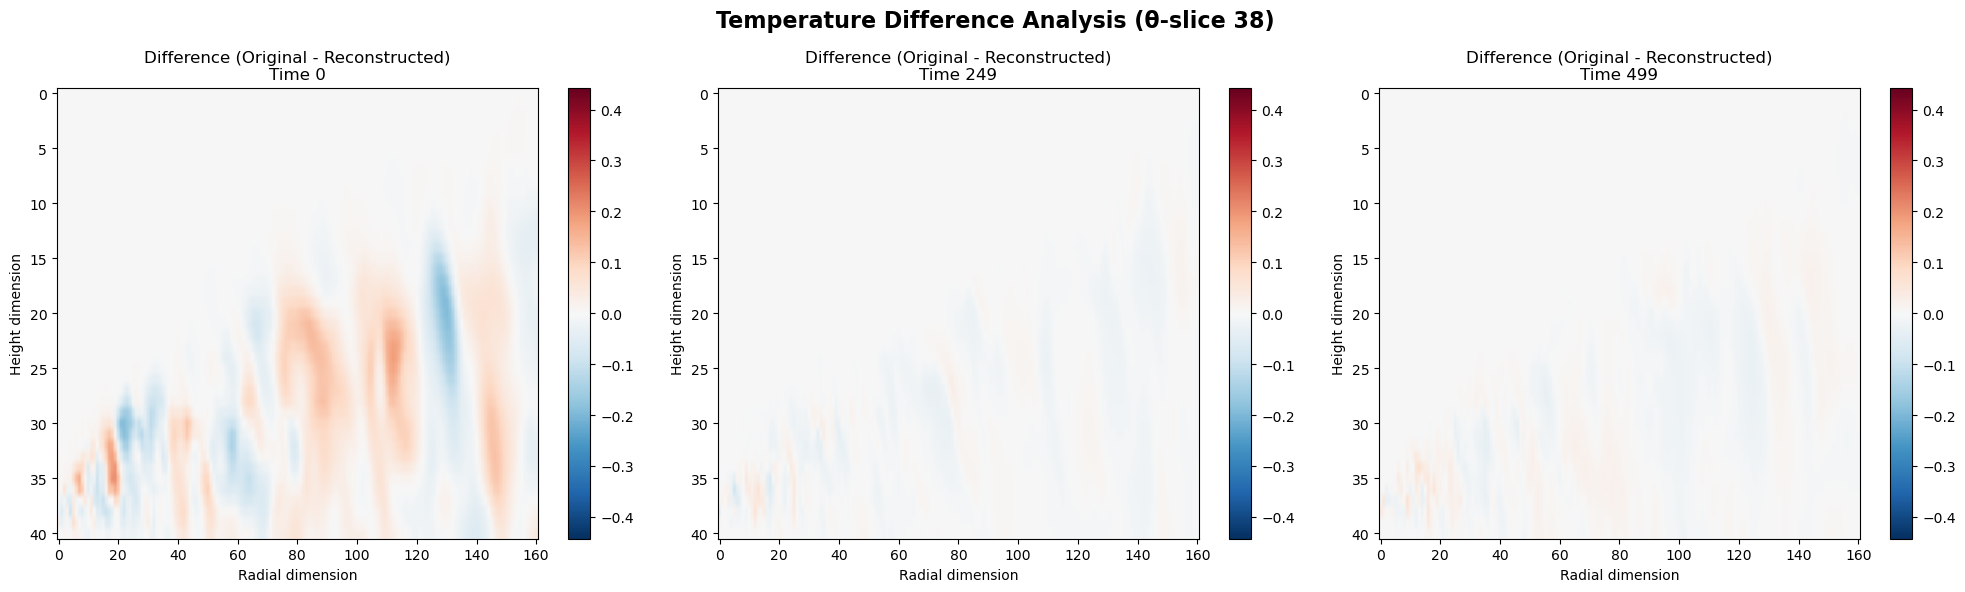

Difference statistics:
Max absolute difference: 0.442816
Mean absolute difference: 0.007360
RMS difference: 0.016164
Relative RMS error: 56.66%


In [5]:
# Calculate and plot difference between original and reconstructed data
difference = np.subtract(original_data, reconstructed_data)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Select same time indices as before
time_indices = np.linspace(0, original_data.shape[3]-1, 3, dtype=int)
mid_slice = original_data.shape[1] // 2

# Use symmetric colorbar for difference plot
diff_max = np.abs(difference).max()

for i, t_idx in enumerate(time_indices):
    im = axes[i].imshow(np.flip(difference[:, mid_slice, :, t_idx], axis=0), 
                       cmap='RdBu_r', aspect='auto', vmin=-diff_max, vmax=diff_max)
    axes[i].set_title(f'Difference (Original - Reconstructed)\nTime {t_idx}')
    axes[i].set_xlabel('Radial dimension')
    axes[i].set_ylabel('Height dimension')
    plt.colorbar(im, ax=axes[i])

plt.suptitle(f'Temperature Difference Analysis (θ-slice {mid_slice})', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print difference statistics
print(f"Difference statistics:")
print(f"Max absolute difference: {diff_max:.6f}")
print(f"Mean absolute difference: {np.abs(difference).mean():.6f}")
print(f"RMS difference: {np.sqrt(np.mean(difference**2)):.6f}")
print(f"Relative RMS error: {np.sqrt(np.mean(difference**2)) / np.sqrt(np.mean(original_data**2)) * 100:.2f}%")

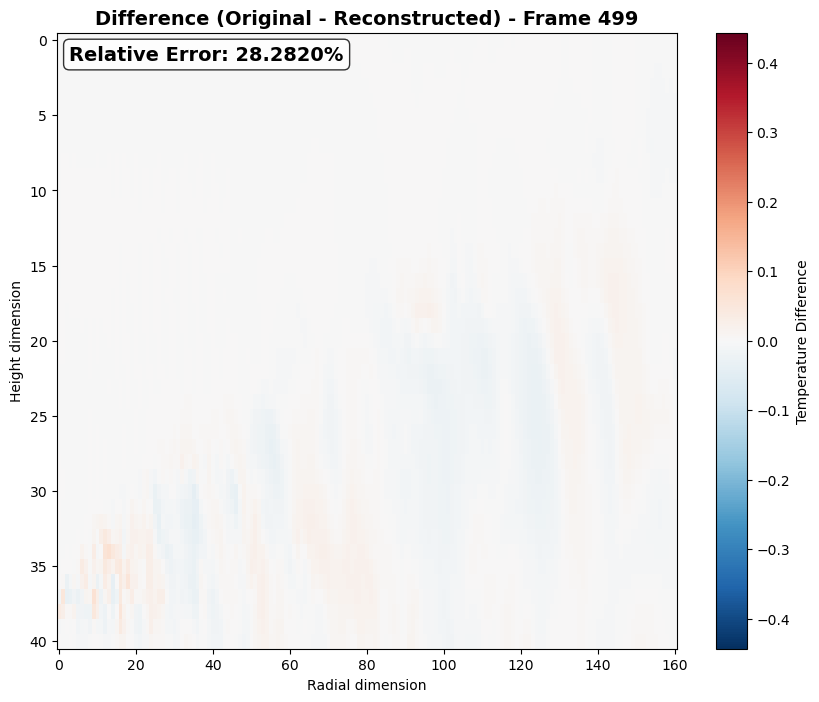

In [6]:
# Animated difference plot with relative error display
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Calculate difference for all time steps
difference = np.subtract(original_data, reconstructed_data)
mid_slice = original_data.shape[1] // 2
diff_max = np.abs(difference).max()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('Radial dimension')
ax.set_ylabel('Height dimension')

# Create initial plot
im = ax.imshow(np.flip(difference[:, mid_slice, :, 0], axis=0), 
               cmap='RdBu_r', aspect='auto', vmin=-diff_max, vmax=diff_max)
cbar = plt.colorbar(im, ax=ax, label='Temperature Difference')

# Add text for difference percentage (top left)
error_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, fontsize=14, 
                     bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                     verticalalignment='top', fontweight='bold')

def animate(frame):
    # Update image data
    im.set_array(np.flip(difference[:, mid_slice, :, frame], axis=0))
    
    # Calculate relative error for this frame
    orig_frame = original_data[:, mid_slice, :, frame]
    diff_frame = difference[:, mid_slice, :, frame]
    relative_error = np.sqrt(np.mean(diff_frame**2)) / np.sqrt(np.mean(orig_frame**2)) * 100
    
    # Update title and error text
    ax.set_title(f'Difference (Original - Reconstructed) - Frame {frame}', fontsize=14, fontweight='bold')
    error_text.set_text(f'Relative Error: {relative_error:.4f}%')
    
    return [im, error_text]

# Create animation
anim = FuncAnimation(fig, animate, frames=difference.shape[3], interval=200, blit=True, repeat=True)

# To save as gif (optional):
anim.save('temperature_difference_animation.gif', writer='pillow', fps=5)

Difference tensor shape: (41, 76, 161, 500)


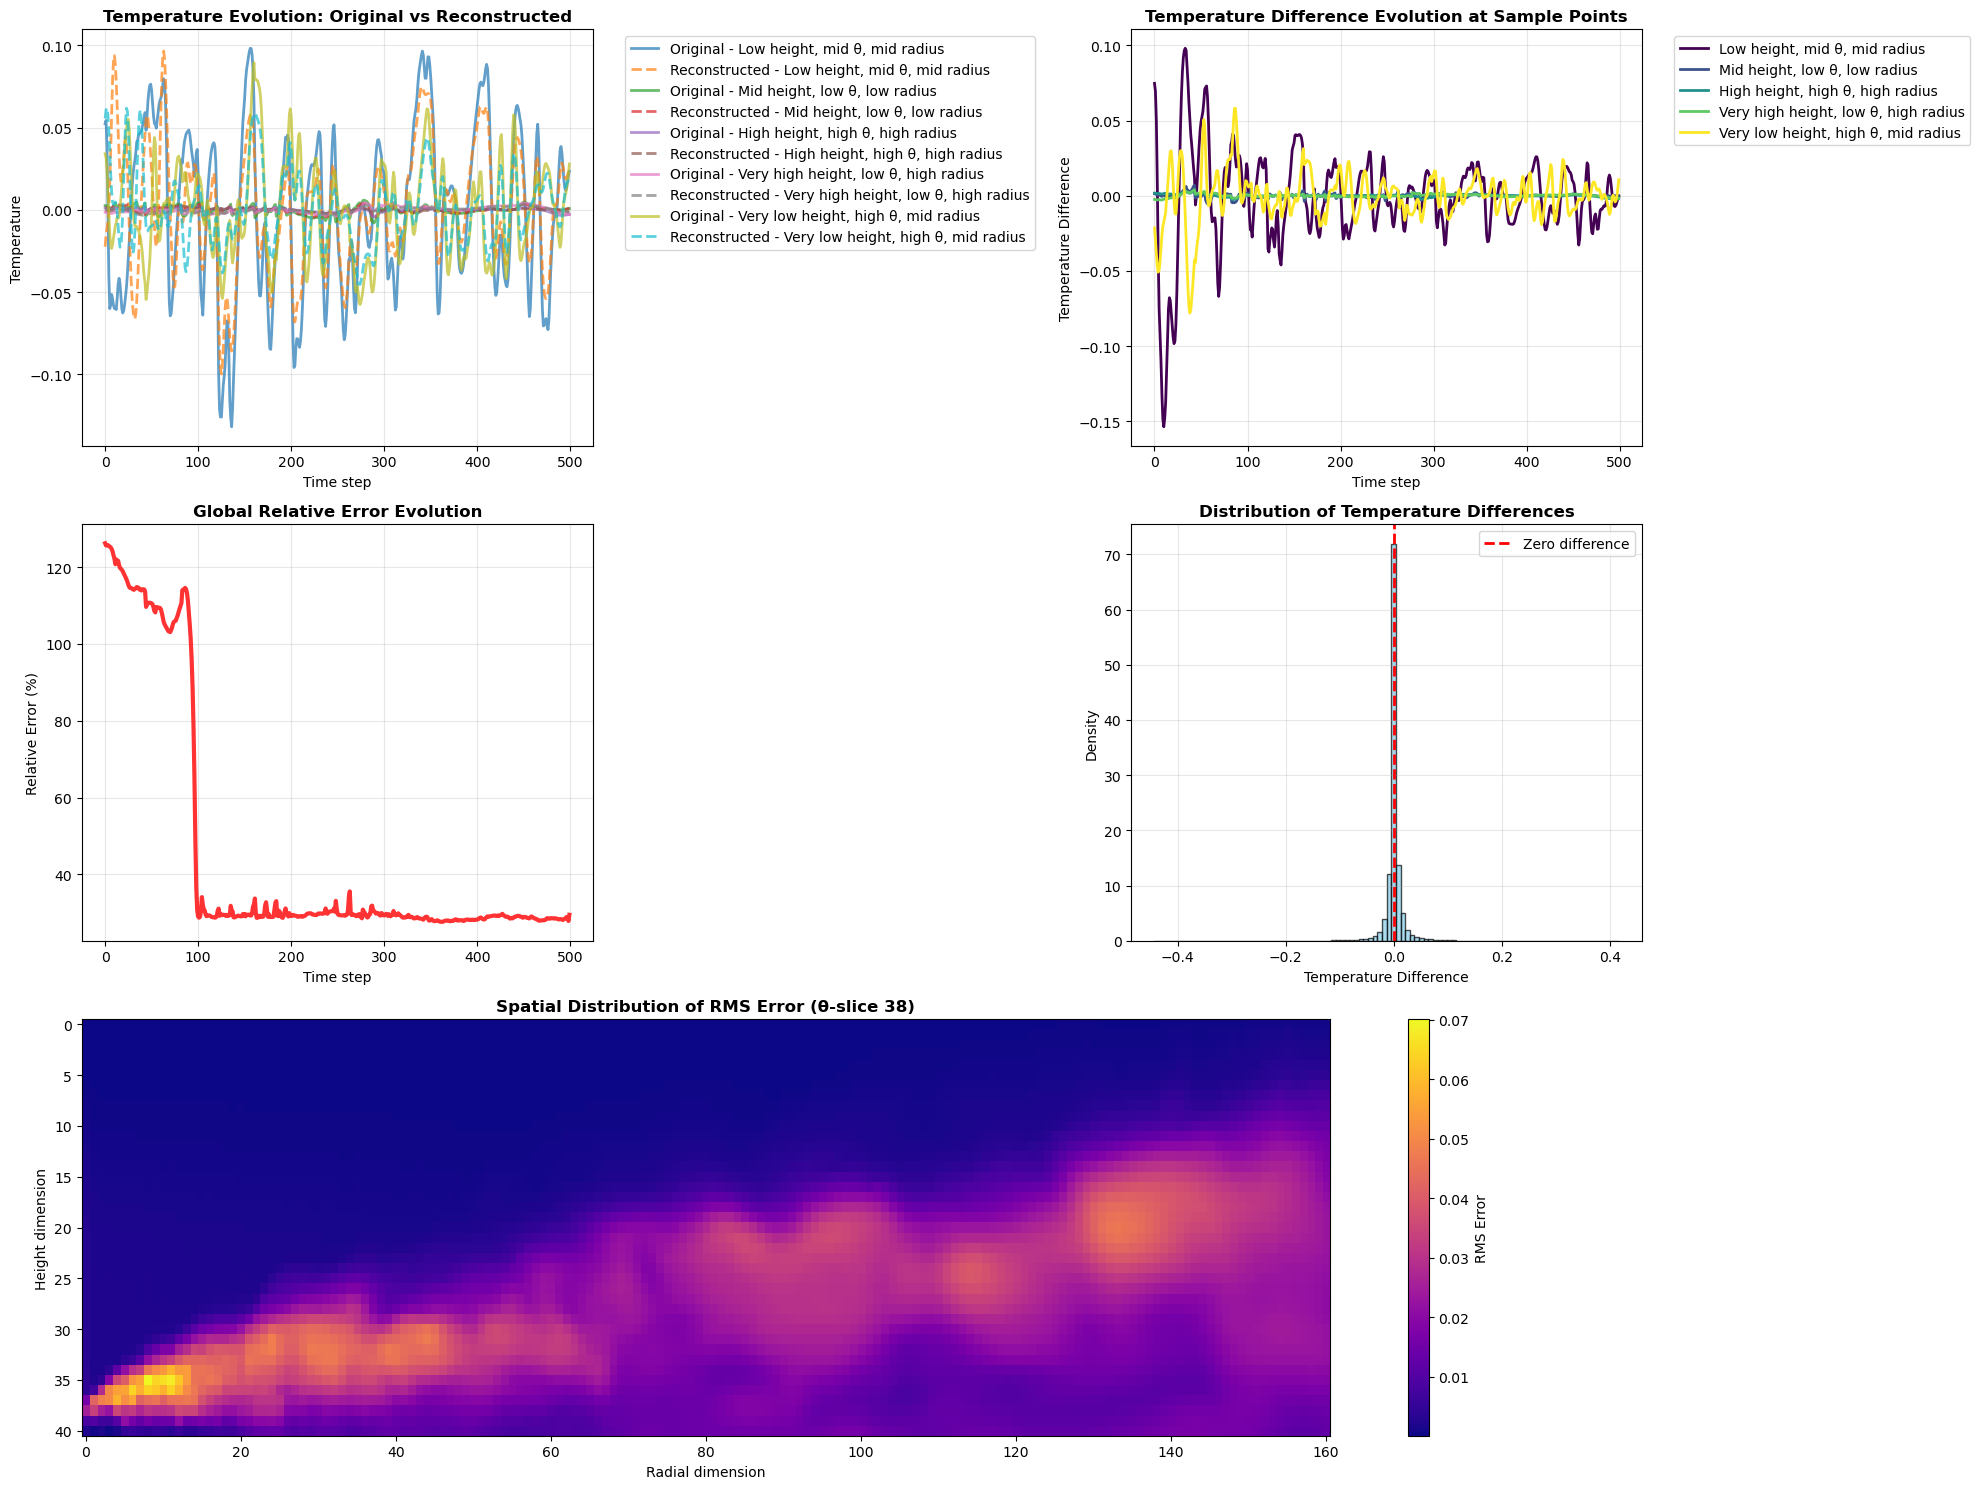


COMPREHENSIVE ANALYSIS SUMMARY
Global Statistics:
  Max absolute difference: 0.442816
  Mean absolute difference: 0.007360
  RMS difference: 0.016164
  Final relative error: 29.4975%

Spatial Point Analysis:
  Low height, mid θ, mid radius:
    RMS error: 0.031539
    Max error: 0.153727
    Relative error: 62.6367%
  Mid height, low θ, low radius:
    RMS error: 0.001466
    Max error: 0.006914
    Relative error: 56.5296%
  High height, high θ, high radius:
    RMS error: 0.000867
    Max error: 0.003102
    Relative error: 75.8476%
  Very high height, low θ, high radius:
    RMS error: 0.001002
    Max error: 0.003986
    Relative error: 51.6694%
  Very low height, high θ, mid radius:
    RMS error: 0.016403
    Max error: 0.078046
    Relative error: 57.6231%

Temporal Analysis:
  Initial relative error: 126.2092%
  Final relative error: 29.4975%
  Average relative error: 45.3093%
  Error trend: Decreasing


In [7]:
# Sample different points and create comprehensive comparison plots
print(f"Difference tensor shape: {difference.shape}")

# Sample strategic points for analysis
sample_points = [
    (10, 30, 40, "Low height, mid θ, mid radius"),
    (20, 20, 20, "Mid height, low θ, low radius"), 
    (30, 50, 80, "High height, high θ, high radius"),
    (35, 10, 120, "Very high height, low θ, high radius"),
    (5, 60, 60, "Very low height, high θ, mid radius")
]

# Create a comprehensive figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# 1. Time series comparison at sampled points
ax1 = plt.subplot(3, 2, 1)
for i, (h, theta, r, label) in enumerate(sample_points):
    # Original data time series
    plt.plot(original_data[h, theta, r, :], 
             label=f'Original - {label}', 
             alpha=0.7, linewidth=2, linestyle='-')
    # Reconstructed data time series
    plt.plot(reconstructed_data[h, theta, r, :], 
             label=f'Reconstructed - {label}', 
             alpha=0.7, linewidth=2, linestyle='--')

plt.xlabel('Time step')
plt.ylabel('Temperature')
plt.title('Temperature Evolution: Original vs Reconstructed', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# 2. Difference time series at sampled points
ax2 = plt.subplot(3, 2, 2)
colors = plt.cm.viridis(np.linspace(0, 1, len(sample_points)))
for i, (h, theta, r, label) in enumerate(sample_points):
    plt.plot(difference[h, theta, r, :], 
             label=label, color=colors[i], linewidth=2)

plt.xlabel('Time step')
plt.ylabel('Temperature Difference')
plt.title('Temperature Difference Evolution at Sample Points', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# 3. Relative error evolution over time
ax3 = plt.subplot(3, 2, 3)
relative_errors = []
for t in range(difference.shape[3]):
    orig_t = original_data[:, :, :, t]
    diff_t = difference[:, :, :, t]
    rel_error = np.sqrt(np.mean(diff_t**2)) / np.sqrt(np.mean(orig_t**2)) * 100
    relative_errors.append(rel_error)

plt.plot(relative_errors, linewidth=3, color='red', alpha=0.8)
plt.xlabel('Time step')
plt.ylabel('Relative Error (%)')
plt.title('Global Relative Error Evolution', fontweight='bold')
plt.grid(True, alpha=0.3)

# 4. Distribution of errors
ax4 = plt.subplot(3, 2, 4)
diff_flat = difference.flatten()
plt.hist(diff_flat, bins=100, alpha=0.7, color='skyblue', edgecolor='black', density=True)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero difference')
plt.xlabel('Temperature Difference')
plt.ylabel('Density')
plt.title('Distribution of Temperature Differences', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Spatial distribution of RMS error
ax5 = plt.subplot(3, 1, 3)
# Calculate RMS error at each spatial point
rms_error = np.sqrt(np.mean(difference**2, axis=3))
mid_slice = rms_error.shape[1] // 2

im = plt.imshow(np.flip(rms_error[:, mid_slice, :], axis=0), 
                cmap='plasma', aspect='auto')
plt.colorbar(im, label='RMS Error')
plt.xlabel('Radial dimension')
plt.ylabel('Height dimension')
plt.title(f'Spatial Distribution of RMS Error (θ-slice {mid_slice})', fontweight='bold')

plt.tight_layout()
plt.show()

# Print comprehensive statistics
print("\n" + "="*60)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*60)
print(f"Global Statistics:")
print(f"  Max absolute difference: {np.abs(difference).max():.6f}")
print(f"  Mean absolute difference: {np.abs(difference).mean():.6f}")
print(f"  RMS difference: {np.sqrt(np.mean(difference**2)):.6f}")
print(f"  Final relative error: {relative_errors[-1]:.4f}%")

print(f"\nSpatial Point Analysis:")
for h, theta, r, label in sample_points:
    point_rms = np.sqrt(np.mean(difference[h, theta, r, :]**2))
    point_max = np.abs(difference[h, theta, r, :]).max()
    orig_rms = np.sqrt(np.mean(original_data[h, theta, r, :]**2))
    rel_error = point_rms / orig_rms * 100 if orig_rms > 0 else 0
    print(f"  {label}:")
    print(f"    RMS error: {point_rms:.6f}")
    print(f"    Max error: {point_max:.6f}")
    print(f"    Relative error: {rel_error:.4f}%")

print(f"\nTemporal Analysis:")
print(f"  Initial relative error: {relative_errors[0]:.4f}%")
print(f"  Final relative error: {relative_errors[-1]:.4f}%")
print(f"  Average relative error: {np.mean(relative_errors):.4f}%")
print(f"  Error trend: {'Increasing' if relative_errors[-1] > relative_errors[0] else 'Decreasing'}")
print("="*60)

Original data tensor shape: (41, 76, 161, 500)


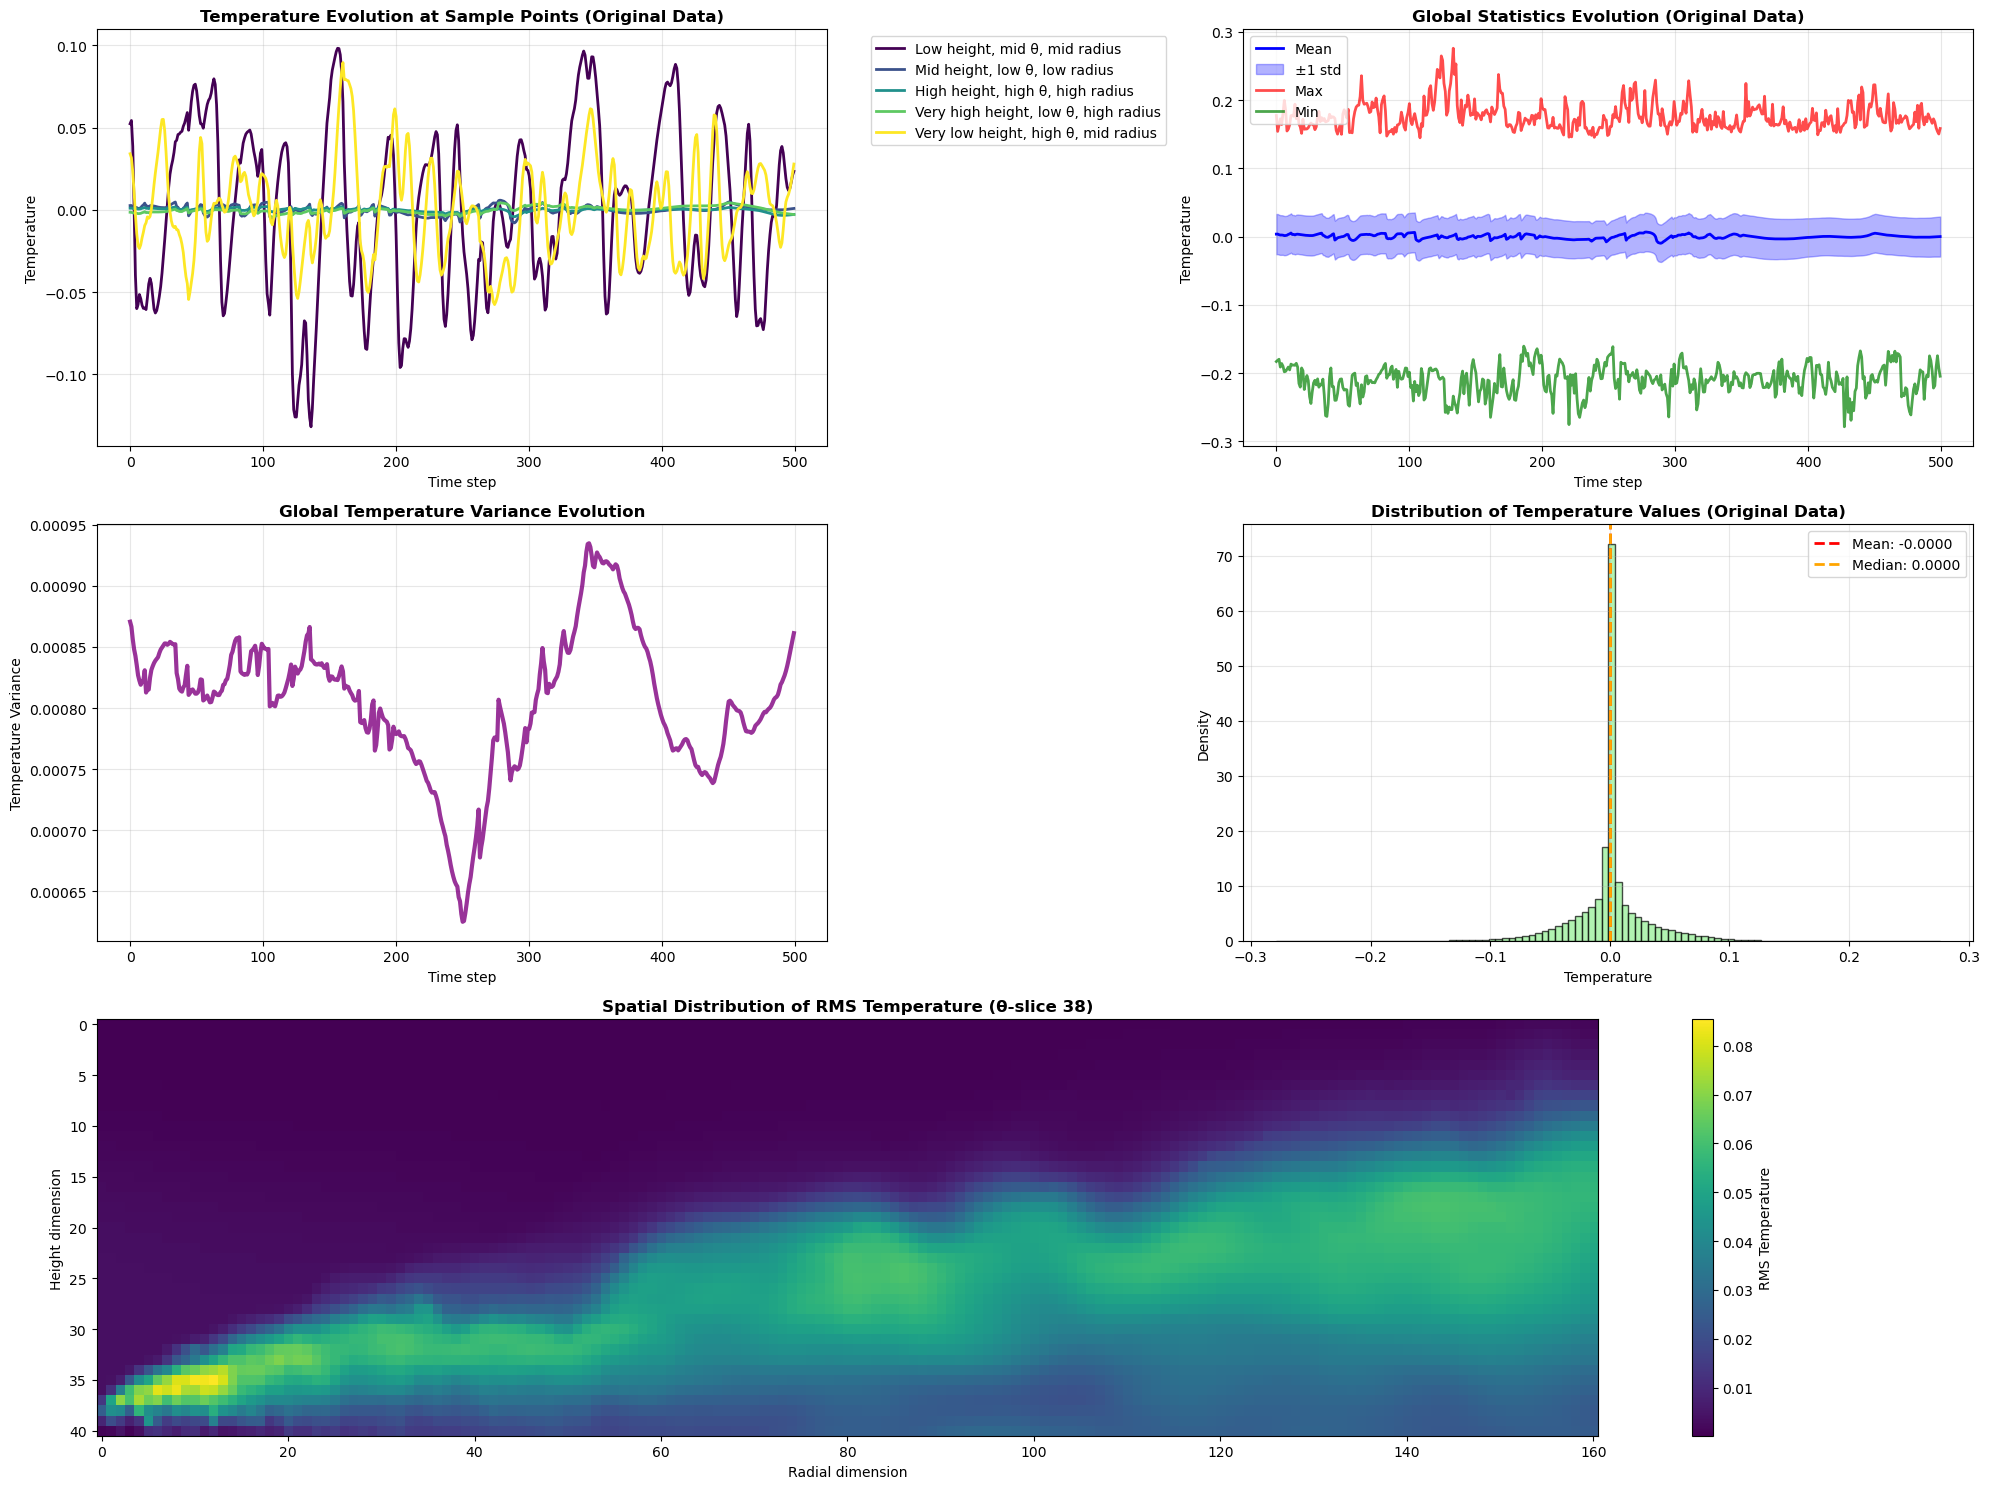


ORIGINAL DATA ANALYSIS SUMMARY
Global Statistics:
  Data range: [-0.278709, 0.276066]
  Global mean: -0.000000
  Global std: 0.028526
  Global RMS: 0.028526

Spatial Point Analysis:
  Low height, mid θ, mid radius:
    Mean: 0.000000
    Std: 0.050352
    RMS: 0.050352
    Range: 0.230178
  Mid height, low θ, low radius:
    Mean: -0.000000
    Std: 0.002593
    RMS: 0.002593
    Range: 0.013815
  High height, high θ, high radius:
    Mean: -0.000000
    Std: 0.001143
    RMS: 0.001143
    Range: 0.006212
  Very high height, low θ, high radius:
    Mean: -0.000000
    Std: 0.001939
    RMS: 0.001939
    Range: 0.008681
  Very low height, high θ, mid radius:
    Mean: 0.000000
    Std: 0.028466
    RMS: 0.028466
    Range: 0.147166

Temporal Analysis:
  Initial global mean: 0.003680
  Final global mean: 0.000093
  Average global variance: 0.000805
  Variance trend: Decreasing


In [8]:
# Comprehensive analysis of ORIGINAL data using same sampling points and visualization approach
print(f"Original data tensor shape: {original_data.shape}")

# Use same strategic points for consistency with difference analysis
sample_points = [
    (10, 30, 40, "Low height, mid θ, mid radius"),
    (20, 20, 20, "Mid height, low θ, low radius"), 
    (30, 50, 80, "High height, high θ, high radius"),
    (35, 10, 120, "Very high height, low θ, high radius"),
    (5, 60, 60, "Very low height, high θ, mid radius")
]

# Create a comprehensive figure for original data analysis
fig = plt.figure(figsize=(20, 15))

# 1. Time series at sampled points
ax1 = plt.subplot(3, 2, 1)
colors = plt.cm.viridis(np.linspace(0, 1, len(sample_points)))
for i, (h, theta, r, label) in enumerate(sample_points):
    plt.plot(original_data[h, theta, r, :], 
             label=label, color=colors[i], linewidth=2)

plt.xlabel('Time step')
plt.ylabel('Temperature')
plt.title('Temperature Evolution at Sample Points (Original Data)', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# 2. Global statistics evolution over time
ax2 = plt.subplot(3, 2, 2)
global_means = []
global_stds = []
global_maxs = []
global_mins = []

for t in range(original_data.shape[3]):
    frame_data = original_data[:, :, :, t]
    global_means.append(np.mean(frame_data))
    global_stds.append(np.std(frame_data))
    global_maxs.append(np.max(frame_data))
    global_mins.append(np.min(frame_data))

plt.plot(global_means, linewidth=2, label='Mean', color='blue')
plt.fill_between(range(len(global_means)), 
                 np.array(global_means) - np.array(global_stds),
                 np.array(global_means) + np.array(global_stds),
                 alpha=0.3, color='blue', label='±1 std')
plt.plot(global_maxs, linewidth=2, label='Max', color='red', alpha=0.7)
plt.plot(global_mins, linewidth=2, label='Min', color='green', alpha=0.7)

plt.xlabel('Time step')
plt.ylabel('Temperature')
plt.title('Global Statistics Evolution (Original Data)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Temperature variance over time
ax3 = plt.subplot(3, 2, 3)
variances = [np.var(original_data[:, :, :, t]) for t in range(original_data.shape[3])]
plt.plot(variances, linewidth=3, color='purple', alpha=0.8)
plt.xlabel('Time step')
plt.ylabel('Temperature Variance')
plt.title('Global Temperature Variance Evolution', fontweight='bold')
plt.grid(True, alpha=0.3)

# 4. Distribution of original data values
ax4 = plt.subplot(3, 2, 4)
orig_flat = original_data.flatten()
plt.hist(orig_flat, bins=100, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
plt.axvline(np.mean(orig_flat), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {np.mean(orig_flat):.4f}')
plt.axvline(np.median(orig_flat), color='orange', linestyle='--', linewidth=2, 
            label=f'Median: {np.median(orig_flat):.4f}')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Distribution of Temperature Values (Original Data)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Spatial distribution of RMS values
ax5 = plt.subplot(3, 1, 3)
# Calculate RMS at each spatial point over time
rms_original = np.sqrt(np.mean(original_data**2, axis=3))
mid_slice = rms_original.shape[1] // 2

im = plt.imshow(np.flip(rms_original[:, mid_slice, :], axis=0), 
                cmap='viridis', aspect='auto')
plt.colorbar(im, label='RMS Temperature')
plt.xlabel('Radial dimension')
plt.ylabel('Height dimension')
plt.title(f'Spatial Distribution of RMS Temperature (θ-slice {mid_slice})', fontweight='bold')

plt.tight_layout()
plt.show()

# Print comprehensive statistics for original data
print("\n" + "="*60)
print("ORIGINAL DATA ANALYSIS SUMMARY")
print("="*60)
print(f"Global Statistics:")
print(f"  Data range: [{original_data.min():.6f}, {original_data.max():.6f}]")
print(f"  Global mean: {np.mean(original_data):.6f}")
print(f"  Global std: {np.std(original_data):.6f}")
print(f"  Global RMS: {np.sqrt(np.mean(original_data**2)):.6f}")

print(f"\nSpatial Point Analysis:")
for h, theta, r, label in sample_points:
    point_data = original_data[h, theta, r, :]
    point_mean = np.mean(point_data)
    point_std = np.std(point_data)
    point_rms = np.sqrt(np.mean(point_data**2))
    point_range = point_data.max() - point_data.min()
    print(f"  {label}:")
    print(f"    Mean: {point_mean:.6f}")
    print(f"    Std: {point_std:.6f}")
    print(f"    RMS: {point_rms:.6f}")
    print(f"    Range: {point_range:.6f}")

print(f"\nTemporal Analysis:")
print(f"  Initial global mean: {global_means[0]:.6f}")
print(f"  Final global mean: {global_means[-1]:.6f}")
print(f"  Average global variance: {np.mean(variances):.6f}")
print(f"  Variance trend: {'Increasing' if variances[-1] > variances[0] else 'Decreasing'}")
print("="*60)

Reconstructed data tensor shape: (41, 76, 161, 500)


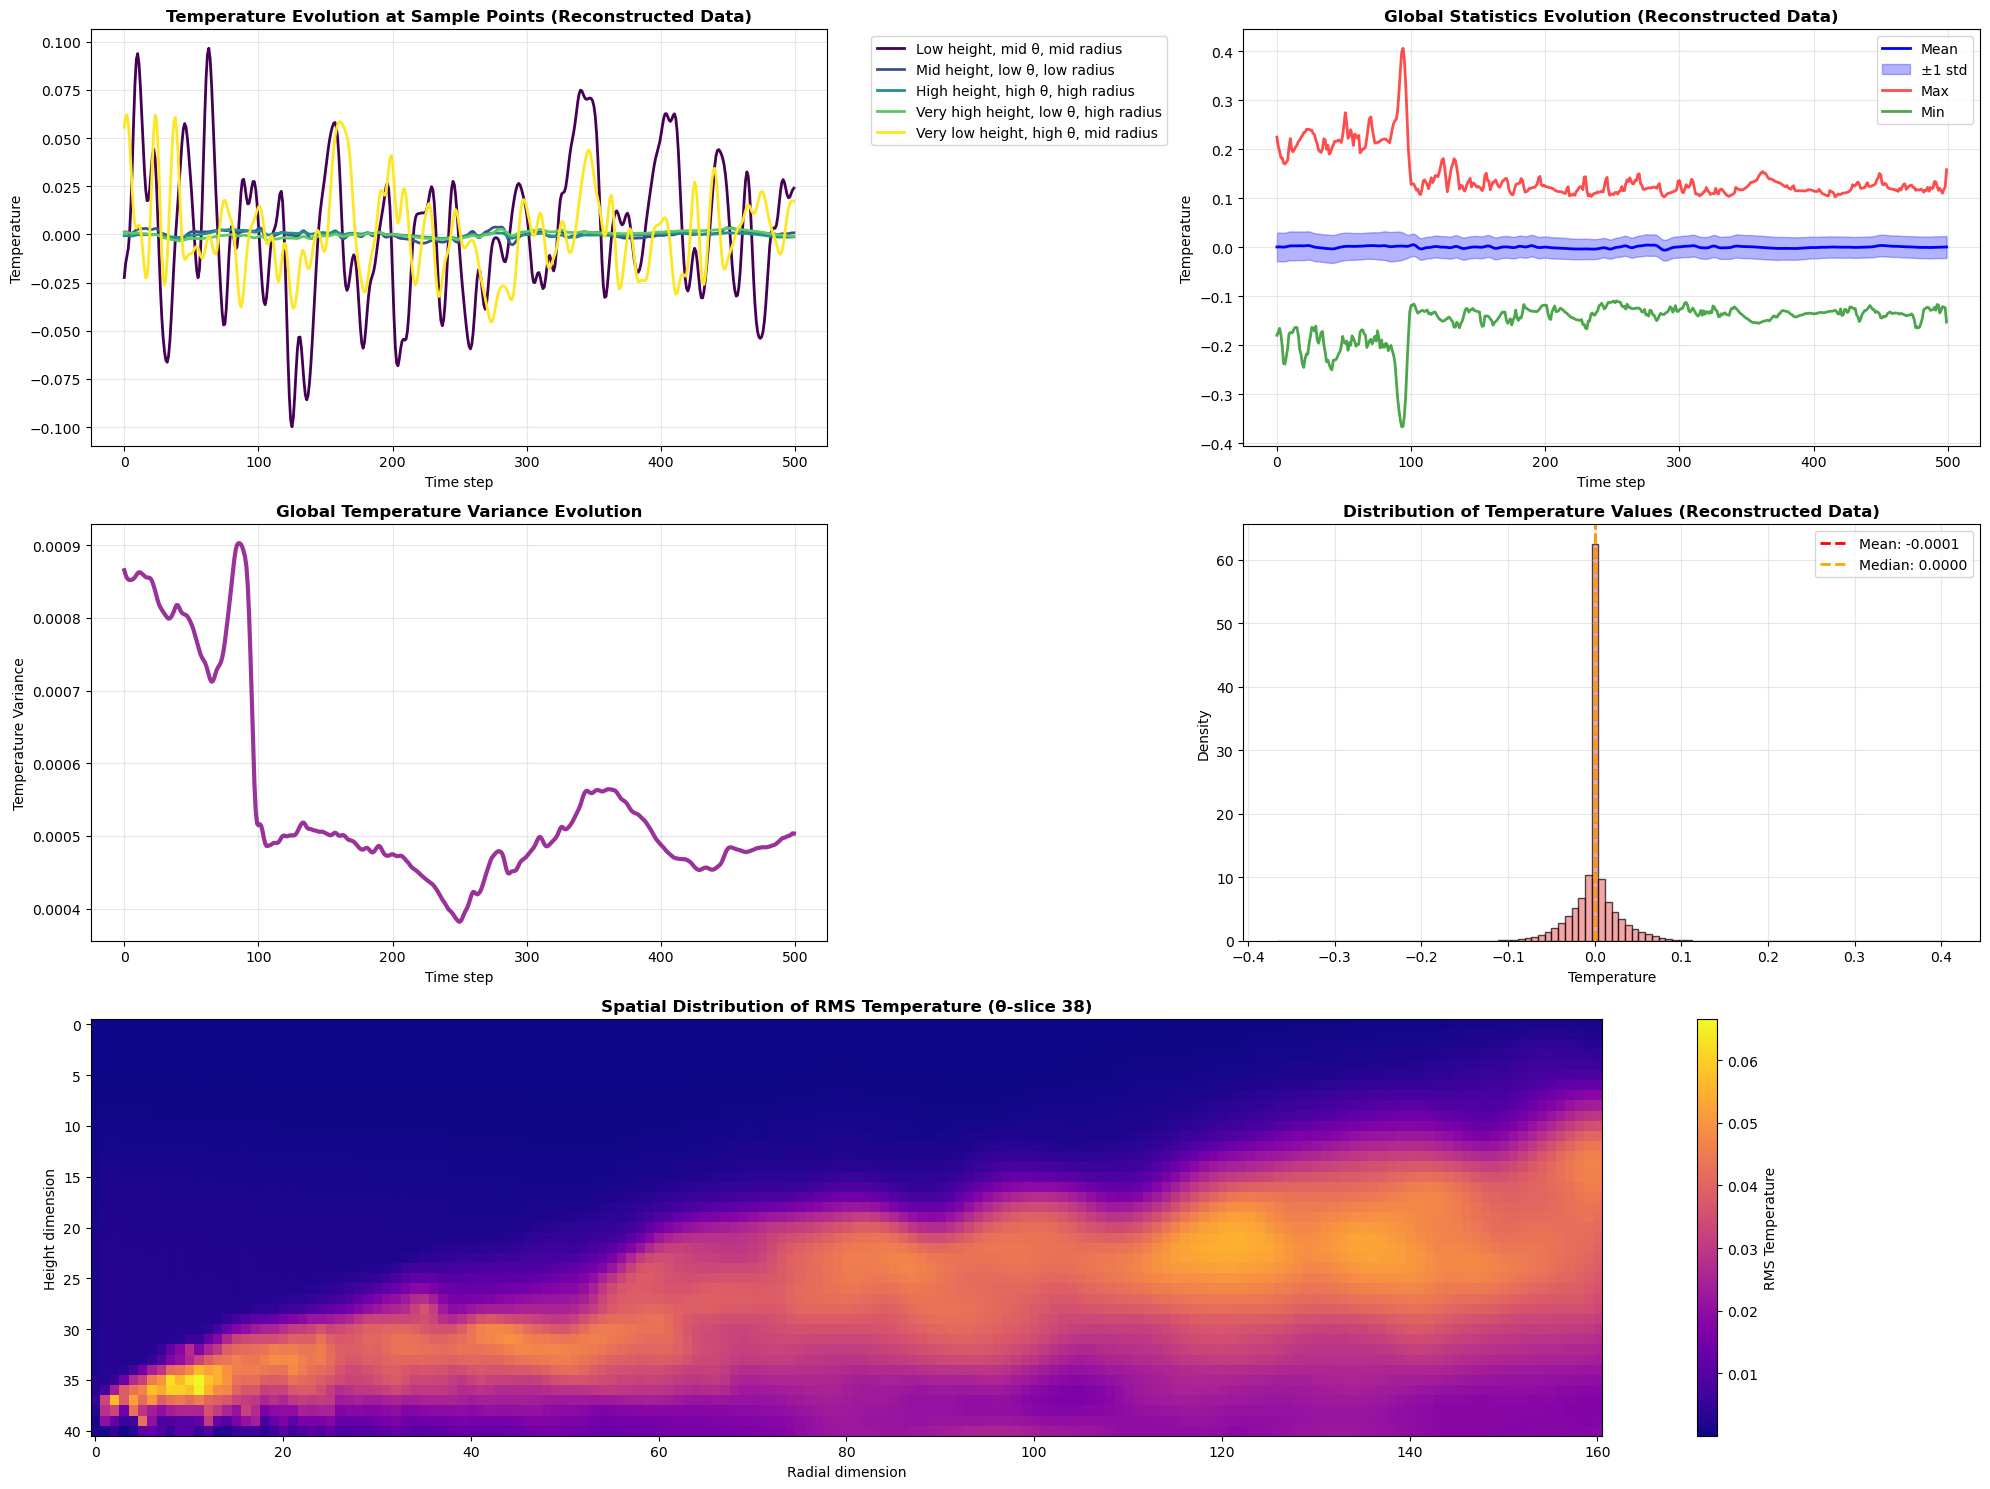


RECONSTRUCTED DATA ANALYSIS SUMMARY
Global Statistics:
  Data range: [-0.366868, 0.405993]
  Global mean: -0.000055
  Global std: 0.023489
  Global RMS: 0.023489

Spatial Point Analysis:
  Low height, mid θ, mid radius:
    Mean: 0.001069
    Std: 0.037035
    RMS: 0.037050
    Range: 0.196420
  Mid height, low θ, low radius:
    Mean: -0.000041
    Std: 0.001857
    RMS: 0.001857
    Range: 0.009217
  High height, high θ, high radius:
    Mean: -0.000062
    Std: 0.000967
    RMS: 0.000969
    Range: 0.004796
  Very high height, low θ, high radius:
    Mean: -0.000055
    Std: 0.001562
    RMS: 0.001563
    Range: 0.006549
  Very low height, high θ, mid radius:
    Mean: 0.000466
    Std: 0.021721
    RMS: 0.021726
    Range: 0.107359

Temporal Analysis:
  Initial global mean: 0.000285
  Final global mean: 0.000243
  Average global variance: 0.000548
  Variance trend: Decreasing


In [3]:
# Comprehensive analysis of RECONSTRUCTED data using same sampling points and visualization approach
print(f"Reconstructed data tensor shape: {reconstructed_data.shape}")

# Use same strategic points for consistency with difference and original data analysis
sample_points = [
    (10, 30, 40, "Low height, mid θ, mid radius"),
    (20, 20, 20, "Mid height, low θ, low radius"), 
    (30, 50, 80, "High height, high θ, high radius"),
    (35, 10, 120, "Very high height, low θ, high radius"),
    (5, 60, 60, "Very low height, high θ, mid radius")
]

# Create a comprehensive figure for reconstructed data analysis
fig = plt.figure(figsize=(20, 15))

# 1. Time series at sampled points
ax1 = plt.subplot(3, 2, 1)
colors = plt.cm.viridis(np.linspace(0, 1, len(sample_points)))
for i, (h, theta, r, label) in enumerate(sample_points):
    plt.plot(reconstructed_data[h, theta, r, :], 
             label=label, color=colors[i], linewidth=2)

plt.xlabel('Time step')
plt.ylabel('Temperature')
plt.title('Temperature Evolution at Sample Points (Reconstructed Data)', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# 2. Global statistics evolution over time
ax2 = plt.subplot(3, 2, 2)
global_means = []
global_stds = []
global_maxs = []
global_mins = []

for t in range(reconstructed_data.shape[3]):
    frame_data = reconstructed_data[:, :, :, t]
    global_means.append(np.mean(frame_data))
    global_stds.append(np.std(frame_data))
    global_maxs.append(np.max(frame_data))
    global_mins.append(np.min(frame_data))

plt.plot(global_means, linewidth=2, label='Mean', color='blue')
plt.fill_between(range(len(global_means)), 
                 np.array(global_means) - np.array(global_stds),
                 np.array(global_means) + np.array(global_stds),
                 alpha=0.3, color='blue', label='±1 std')
plt.plot(global_maxs, linewidth=2, label='Max', color='red', alpha=0.7)
plt.plot(global_mins, linewidth=2, label='Min', color='green', alpha=0.7)

plt.xlabel('Time step')
plt.ylabel('Temperature')
plt.title('Global Statistics Evolution (Reconstructed Data)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Temperature variance over time
ax3 = plt.subplot(3, 2, 3)
variances = [np.var(reconstructed_data[:, :, :, t]) for t in range(reconstructed_data.shape[3])]
plt.plot(variances, linewidth=3, color='purple', alpha=0.8)
plt.xlabel('Time step')
plt.ylabel('Temperature Variance')
plt.title('Global Temperature Variance Evolution', fontweight='bold')
plt.grid(True, alpha=0.3)

# 4. Distribution of reconstructed data values
ax4 = plt.subplot(3, 2, 4)
recon_flat = reconstructed_data.flatten()
plt.hist(recon_flat, bins=100, alpha=0.7, color='lightcoral', edgecolor='black', density=True)
plt.axvline(np.mean(recon_flat), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {np.mean(recon_flat):.4f}')
plt.axvline(np.median(recon_flat), color='orange', linestyle='--', linewidth=2, 
            label=f'Median: {np.median(recon_flat):.4f}')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Distribution of Temperature Values (Reconstructed Data)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Spatial distribution of RMS values
ax5 = plt.subplot(3, 1, 3)
# Calculate RMS at each spatial point over time
rms_reconstructed = np.sqrt(np.mean(reconstructed_data**2, axis=3))
mid_slice = rms_reconstructed.shape[1] // 2

im = plt.imshow(np.flip(rms_reconstructed[:, mid_slice, :], axis=0), 
                cmap='plasma', aspect='auto')
plt.colorbar(im, label='RMS Temperature')
plt.xlabel('Radial dimension')
plt.ylabel('Height dimension')
plt.title(f'Spatial Distribution of RMS Temperature (θ-slice {mid_slice})', fontweight='bold')

plt.tight_layout()
plt.show()

# Print comprehensive statistics for reconstructed data
print("\n" + "="*60)
print("RECONSTRUCTED DATA ANALYSIS SUMMARY")
print("="*60)
print(f"Global Statistics:")
print(f"  Data range: [{reconstructed_data.min():.6f}, {reconstructed_data.max():.6f}]")
print(f"  Global mean: {np.mean(reconstructed_data):.6f}")
print(f"  Global std: {np.std(reconstructed_data):.6f}")
print(f"  Global RMS: {np.sqrt(np.mean(reconstructed_data**2)):.6f}")

print(f"\nSpatial Point Analysis:")
for h, theta, r, label in sample_points:
    point_data = reconstructed_data[h, theta, r, :]
    point_mean = np.mean(point_data)
    point_std = np.std(point_data)
    point_rms = np.sqrt(np.mean(point_data**2))
    point_range = point_data.max() - point_data.min()
    print(f"  {label}:")
    print(f"    Mean: {point_mean:.6f}")
    print(f"    Std: {point_std:.6f}")
    print(f"    RMS: {point_rms:.6f}")
    print(f"    Range: {point_range:.6f}")

print(f"\nTemporal Analysis:")
print(f"  Initial global mean: {global_means[0]:.6f}")
print(f"  Final global mean: {global_means[-1]:.6f}")
print(f"  Average global variance: {np.mean(variances):.6f}")
print(f"  Variance trend: {'Increasing' if variances[-1] > variances[0] else 'Decreasing'}")
print("="*60)